# Studi Kasus: Analisis Efisiensi Gaji dan Performa Skuad dalam Kemenangan Liverpool di Premier League

**Kelasemen Premier League 2024/2025**

In [ ]:
import pandas as pd

# Nama file yang Anda berikan
file_name = 'fixtures.csv'

try:
    # Membaca file CSV Anda
    matches_df = pd.read_csv(r'D:\Portofolio\Premier league\Data\fixtures.csv')
    print(f"File '{file_name}' berhasil dimuat. Memulai pengolahan...")
    
    # Menghapus baris dimana skor masih kosong (jika ada jadwal mendatang)
    matches_df.dropna(subset=['HomeScore', 'AwayScore'], inplace=True)
    
    # Mengubah tipe data skor menjadi integer
    matches_df['HomeScore'] = matches_df['HomeScore'].astype(int)
    matches_df['AwayScore'] = matches_df['AwayScore'].astype(int)

except FileNotFoundError:
    print(f"GAGAL: File '{file_name}' tidak ditemukan. Mohon unggah kembali.")
    exit()
except Exception as e:
    print(f"Terjadi error: {e}")
    exit()

# Siapkan dictionary untuk menyimpan statistik tim
team_stats = {}

def init_team(team_name):
    if team_name not in team_stats:
        team_stats[team_name] = {'MP': 0, 'W': 0, 'D': 0, 'L': 0, 'GF': 0, 'GA': 0, 'Pts': 0}

# Loop melalui setiap pertandingan
for index, match in matches_df.iterrows():
    # Gunakan nama kolom yang Anda berikan
    home_team = match['Home']
    away_team = match['Away']
    home_goals = match['HomeScore']
    away_goals = match['AwayScore']

    init_team(home_team)
    init_team(away_team)

    # Update statistik dasar
    team_stats[home_team]['MP'] += 1
    team_stats[away_team]['MP'] += 1
    team_stats[home_team]['GF'] += home_goals
    team_stats[away_team]['GF'] += away_goals
    team_stats[home_team]['GA'] += away_goals
    team_stats[away_team]['GA'] += home_goals

    # Tentukan hasil dan update Poin, Menang, Seri, Kalah
    if home_goals > away_goals:
        team_stats[home_team]['W'] += 1
        team_stats[home_team]['Pts'] += 3
        team_stats[away_team]['L'] += 1
    elif away_goals > home_goals:
        team_stats[away_team]['W'] += 1
        team_stats[away_team]['Pts'] += 3
        team_stats[home_team]['L'] += 1
    else:
        team_stats[home_team]['D'] += 1
        team_stats[home_team]['Pts'] += 1
        team_stats[away_team]['D'] += 1

# Ubah dictionary menjadi Tabel (DataFrame)
league_table = pd.DataFrame.from_dict(team_stats, orient='index')

# Hitung Selisih Gol (Goal Difference)
league_table['GD'] = league_table['GF'] - league_table['GA']

# Urutkan klasemen
league_table = league_table.sort_values(by=['Pts', 'GD', 'GF'], ascending=[False, False, False])

# Tambahkan kolom Peringkat (Pos) dan rapikan urutan kolom
league_table.reset_index(inplace=True)
league_table.rename(columns={'index': 'Team'}, inplace=True)
league_table['Pos'] = league_table.index + 1
league_table = league_table[['Pos', 'Team', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]

# Tampilkan klasemen akhir
print("\n--- Klasemen Akhir Premier League ---")
print(league_table.to_string())

# Cek posisi Liverpool
try:
    liverpool_rank = league_table[league_table['Team'] == 'Liverpool']['Pos'].iloc[0]
    print(f"\nVALIDASI BERHASIL: Liverpool ditemukan di peringkat {liverpool_rank}.")
except IndexError:
    print("\nINFO: Tim 'Liverpool' tidak ditemukan dalam dataset ini.")

File 'fixtures.csv' berhasil dimuat. Memulai pengolahan...

--- Klasemen Akhir Premier League ---
    Pos             Team  MP   W   D   L  GF  GA  GD  Pts
0     1        Liverpool  38  25   9   4  86  41  45   79
1     2          Arsenal  38  20  14   4  69  34  35   66
2     3  Manchester City  38  21   8   9  72  44  28   66
3     4          Chelsea  38  20   9   9  64  43  21   65
4     5      Aston Villa  38  19   9  10  58  51   7   64
5     6    Newcastle Utd  38  20   6  12  68  47  21   62
6     7  Nott'ham Forest  38  19   8  11  58  46  12   62
7     8         Brighton  38  16  13   9  66  59   7   56
8     9        Brentford  38  16   8  14  66  57   9   52
9    10           Fulham  38  15   9  14  54  54   0   50
10   11      Bournemouth  38  15  11  12  58  46  12   49
11   12   Crystal Palace  38  13  14  11  51  51   0   46
12   13          Everton  38  11  15  12  42  44  -2   42
13   14           Wolves  38  12   6  20  54  69 -15   39
14   15         West Ham  38  11

# **Player Wage **

Klasemen berhasil dibuat.
Data gaji berhasil diolah.
Data klasemen dan gaji berhasil digabungkan.
Membuat visualisasi...


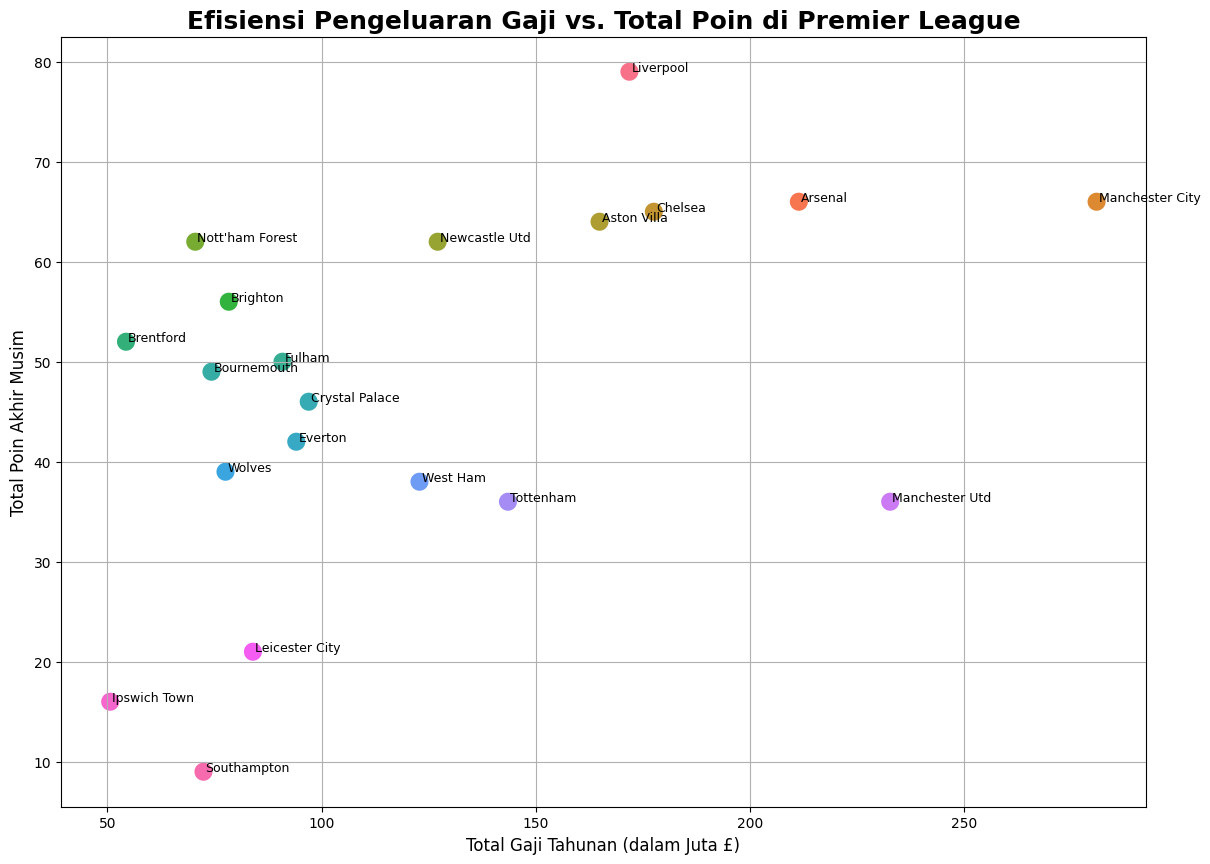

In [ ]:
# Bagian 2: Mengolah Data Gaji dan Membuat Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    
    matches_df = pd.read_csv(r'D:\Portofolio\Premier league\Data\fixtures.csv')
    
    matches_df.dropna(subset=['HomeScore', 'AwayScore'], inplace=True)
    matches_df['HomeScore'] = matches_df['HomeScore'].astype(int)
    matches_df['AwayScore'] = matches_df['AwayScore'].astype(int)

    team_stats = {}
    def init_team(team_name):
        if team_name not in team_stats:
            team_stats[team_name] = {'MP': 0, 'W': 0, 'D': 0, 'L': 0, 'GF': 0, 'GA': 0, 'Pts': 0}

    for index, match in matches_df.iterrows():
        home_team, away_team = match['Home'], match['Away']
        home_goals, away_goals = match['HomeScore'], match['AwayScore']
        init_team(home_team); init_team(away_team)
        
        team_stats[home_team]['MP'] += 1; team_stats[away_team]['MP'] += 1
        team_stats[home_team]['GF'] += home_goals; team_stats[away_team]['GF'] += away_goals
        team_stats[home_team]['GA'] += away_goals; team_stats[away_team]['GA'] += home_goals

        if home_goals > away_goals:
            team_stats[home_team]['W'] += 1; team_stats[home_team]['Pts'] += 3; team_stats[away_team]['L'] += 1
        elif away_goals > home_goals:
            team_stats[away_team]['W'] += 1; team_stats[away_team]['Pts'] += 3; team_stats[home_team]['L'] += 1
        else:
            team_stats[home_team]['D'] += 1; team_stats[home_team]['Pts'] += 1; team_stats[away_team]['D'] += 1

    league_table = pd.DataFrame.from_dict(team_stats, orient='index')
    league_table['GD'] = league_table['GF'] - league_table['GA']
    league_table = league_table.sort_values(by=['Pts', 'GD', 'GF'], ascending=[False, False, False])
    league_table.reset_index(inplace=True)
    league_table.rename(columns={'index': 'Team'}, inplace=True)
    print("Klasemen berhasil dibuat.")

except Exception as e:
    print(f"Error di Bagian 1: {e}")
    exit()

# Mengolah Data Gaji dan Menggabungkannya
try:

    salaries_df = pd.read_csv(r'D:\Portofolio\Premier league\Data\player_salaries.csv')

    # Kita menggunakan 'Annual' karena datanya sudah bersih dan berupa angka
    team_wages = salaries_df.groupby('Team')['Annual'].sum().reset_index()
    team_wages.rename(columns={'Annual': 'Total_Annual_Wages'}, inplace=True)
    
    print("Data gaji berhasil diolah.")

    # Gabungkan data klasemen dengan data total gaji
    full_stats = pd.merge(league_table, team_wages, on='Team', how='left')

    # Mengubah unit gaji ke jutaan Poundsterling
    full_stats['Wages_in_Millions'] = full_stats['Total_Annual_Wages'] / 1000000
    print("Data klasemen dan gaji berhasil digabungkan.")

except Exception as e:
    print(f"Error di Bagian 2: {e}")
    exit()

# Membuat Visualisasi Scatter Plot
print("Membuat visualisasi...")
plt.figure(figsize=(14, 10))
sns.scatterplot(data=full_stats, x='Wages_in_Millions', y='Pts', hue='Team', s=200, legend=False)

for i in range(full_stats.shape[0]):
    plt.text(x=full_stats.Wages_in_Millions.iloc[i]+0.5, y=full_stats.Pts.iloc[i], s=full_stats.Team.iloc[i], fontdict=dict(size=9))

plt.title('Efisiensi Pengeluaran Gaji vs. Total Poin di Premier League', fontsize=18, fontweight='bold')
plt.xlabel('Total Gaji Tahunan (dalam Juta £)', fontsize=12)
plt.ylabel('Total Poin Akhir Musim', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Muat file gaji dan periksa kolomnya
import pandas as pd

file_path_salaries = r'D:\Portofolio\Premier league\Data\player_salaries.csv'
try:
    salaries_df = pd.read_csv(file_path_salaries)
    print("--- File Gaji Berhasil Dimuat ---")
    print("5 baris pertama:")
    print(salaries_df.head())
    print("\nInformasi Kolom:")
    salaries_df.info()
except Exception as e:
    print(f"Error pada Langkah 2a: {e}")

--- File Gaji Berhasil Dimuat ---
5 baris pertama:
            Player Nation Position             Team  Age  Weekly    Annual
0  Kevin De Bruyne    BEL    MF,FW  Manchester City   33  488501  25402046
1   Erling Haaland    NOR       FW  Manchester City   24  457970  23814418
2         Casemiro    BRA       MF   Manchester Utd   32  427438  22226790
3    Mohamed Salah    EGY       FW        Liverpool   32  427438  22226790
4  Bruno Fernandes    POR       MF   Manchester Utd   29  366376  19051534

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    684 non-null    object
 1   Nation    503 non-null    object
 2   Position  677 non-null    object
 3   Team      684 non-null    object
 4   Age       684 non-null    int64 
 5   Weekly    684 non-null    int64 
 6   Annual    684 non-null    int64 
dtypes: int64(3), object(4)
memory 

In [ ]:
# bersihkan kolom gaji
try:
    print("Data di kolom 'Weekly' sebelum dibersihkan:")
    print(salaries_df['Weekly'].head())

    # Membersihkan '£' dan ',' lalu mengubah ke angka
    salaries_df['Salary_Clean'] = salaries_df['Weekly'].replace({r'[£,]': ''}, regex=True).astype(float)
    
    print("\n--- Kolom Gaji Berhasil Dibersihkan ---")
    print("Data setelah dibersihkan:")
    print(salaries_df[['Weekly', 'Salary_Clean']].head())
except Exception as e:
    print(f"Error pada Langkah 2b: {e}")

Data di kolom 'Weekly' sebelum dibersihkan:
0    488501
1    457970
2    427438
3    427438
4    366376
Name: Weekly, dtype: int64

--- Kolom Gaji Berhasil Dibersihkan ---
Data setelah dibersihkan:
   Weekly  Salary_Clean
0  488501      488501.0
1  457970      457970.0
2  427438      427438.0
3  427438      427438.0
4  366376      366376.0


In [ ]:
# kelompokkan berdasarkan tim
try:
    # Mengelompokkan berdasarkan 'Team' dan menjumlahkan gaji yang sudah bersih
    team_wages = salaries_df.groupby('Team')['Salary_Clean'].sum().reset_index()

    print("--- Pengelompokan Berdasarkan Tim Berhasil ---")
    print("Contoh hasil setelah dikelompokkan:")
    print(team_wages.head())
except Exception as e:
    print(f"Error pada Langkah 2c: {e}")

--- Pengelompokan Berdasarkan Tim Berhasil ---
Contoh hasil setelah dikelompokkan:
          Team  Salary_Clean
0      Arsenal     4064507.0
1  Aston Villa     3170082.0
2  Bournemouth     1428818.0
3    Brentford     1045273.0
4     Brighton     1506540.0


# Best Performance Squad in Premier League 2024/2025

File 'D:\Portofolio\Premier league\Data\player_stats.csv' berhasil dimuat.
Menganalisis 24 pemain untuk Liverpool...

--- Analisis Skuad Liverpool ---

Top 5 Pencetak Gol:
                   name  goals  played
446       Mohamed Salah     28      37
132           Luis Díaz     13      35
190          Cody Gakpo     10      34
496  Dominik Szoboszlai      6      35
268          Diogo Jota      6      25

Top 5 Pemberi Assist:
                       name  assists  played
446           Mohamed Salah       18      37
14   Trent Alexander-Arnold        6      32
496      Dominik Szoboszlai        6      35
315     Alexis Mac Allister        5      35
132               Luis Díaz        5      35

Top 5 Pengoper Progresif (Playmaker):
                       name  progressive_passes position
14   Trent Alexander-Arnold                 228       DF
527         Virgil van Dijk                 182       DF
315     Alexis Mac Allister                 177       MF
208        Ryan Gravenberch       

C:\Users\MAULANA\AppData\Local\Temp\ipykernel_16488\2557457495.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='goals', y='name', data=top_scorers, palette='Reds_r')
C:\Users\MAULANA\AppData\Local\Temp\ipykernel_16488\2557457495.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x='assists', y='name', data=top_assisters, palette='Greens_r')
C:\Users\MAULANA\AppData\Local\Temp\ipykernel_16488\2557457495.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x='progressive_passes', y='name', 

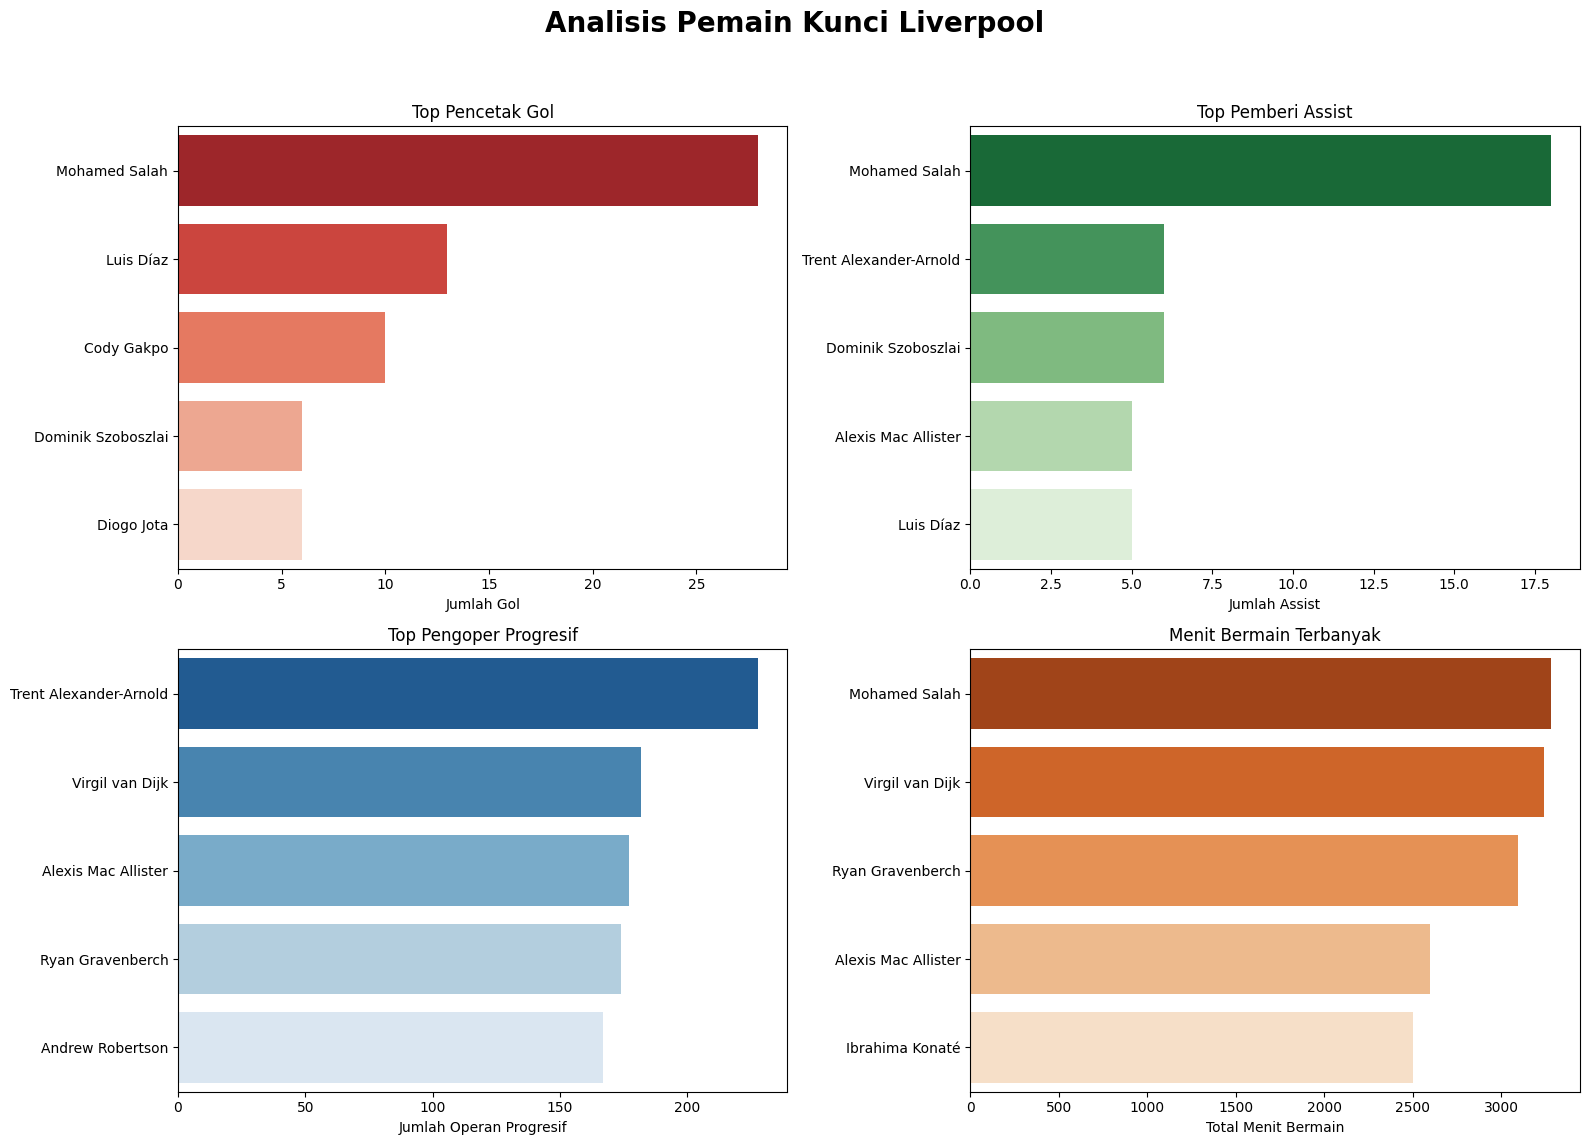

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Konfigurasi ---
file_path_stats = r'D:\Portofolio\Premier league\Data\player_stats.csv'
# Anda bisa mengganti nama tim di sini untuk menganalisis klub lain!
team_to_analyze = 'Liverpool'

# ==============================================================================
# Identifikasi Pemain Kunci
# ==============================================================================
try:
    # 1. Muat dataset statistik pemain
    stats_df = pd.read_csv(file_path_stats)
    print(f"File '{file_path_stats}' berhasil dimuat.")

    # 2. Filter untuk mendapatkan pemain dari tim yang dianalisis
    team_df = stats_df[stats_df['team'] == team_to_analyze].copy()
    print(f"Menganalisis {len(team_df)} pemain untuk {team_to_analyze}...")
    
    # 3. Temukan Top Performer di berbagai kategori
    # Mengurutkan data berdasarkan metrik tertentu dan mengambil 5 teratas
    top_scorers = team_df.sort_values(by='goals', ascending=False).head(5)
    top_assisters = team_df.sort_values(by='assists', ascending=False).head(5)
    top_playmakers = team_df.sort_values(by='progressive_passes', ascending=False).head(5)
    most_minutes = team_df.sort_values(by='minutes', ascending=False).head(5)

    # 4. Tampilkan hasil dalam bentuk teks
    print("\n--- Analisis Skuad Liverpool ---")
    print("\nTop 5 Pencetak Gol:")
    # Menampilkan hanya kolom yang relevan
    print(top_scorers[['name', 'goals', 'played']])
    
    print("\nTop 5 Pemberi Assist:")
    print(top_assisters[['name', 'assists', 'played']])
    
    print("\nTop 5 Pengoper Progresif (Playmaker):")
    print(top_playmakers[['name', 'progressive_passes', 'position']])

    print("\nTop 5 Pemain dengan Menit Bermain Terbanyak:")
    print(most_minutes[['name', 'minutes', 'starts']])

    # 5. Buat Visualisasi untuk perbandingan
    # Membuat grid 2x2 untuk menampung 4 grafik
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Analisis Pemain Kunci {team_to_analyze}', fontsize=20, fontweight='bold')
    
    # Plot Top Scorers
    sns.barplot(ax=axes[0, 0], x='goals', y='name', data=top_scorers, palette='Reds_r')
    axes[0, 0].set_title('Top Pencetak Gol')
    axes[0, 0].set_xlabel('Jumlah Gol')
    axes[0, 0].set_ylabel('') # Menghilangkan label y agar tidak berantakan

    # Plot Top Assisters
    sns.barplot(ax=axes[0, 1], x='assists', y='name', data=top_assisters, palette='Greens_r')
    axes[0, 1].set_title('Top Pemberi Assist')
    axes[0, 1].set_xlabel('Jumlah Assist')
    axes[0, 1].set_ylabel('')

    # Plot Top Playmakers (Operan Progresif)
    sns.barplot(ax=axes[1, 0], x='progressive_passes', y='name', data=top_playmakers, palette='Blues_r')
    axes[1, 0].set_title('Top Pengoper Progresif')
    axes[1, 0].set_xlabel('Jumlah Operan Progresif')
    axes[1, 0].set_ylabel('')
    
    # Plot Menit Bermain Terbanyak
    sns.barplot(ax=axes[1, 1], x='minutes', y='name', data=most_minutes, palette='Oranges_r')
    axes[1, 1].set_title('Menit Bermain Terbanyak')
    axes[1, 1].set_xlabel('Total Menit Bermain')
    axes[1, 1].set_ylabel('')

    # Merapikan layout dan menampilkan plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print(f"GAGAL: File '{file_path_stats}' tidak ditemukan. Pastikan path file sudah benar.")
except KeyError as e:
    print(f"GAGAL: Terjadi error nama kolom. Pastikan kolom {e} ada di dalam file Anda.")
except Exception as e:
    print(f"Terjadi error tak terduga: {e}")

# Value For Money

File 'player_stats.csv' dan 'salaries.csv' berhasil dimuat.

--- Analisis Value for Money: Liverpool (Pemain Depan & Tengah) ---
Diurutkan dari yang paling efisien (biaya per kontribusi gol terendah)
               name  goal_contributions      Annual cost_per_contribution
          Luis Díaz                  18  £3,492,781              £194,043
      Mohamed Salah                  46 £22,226,790              £483,191
         Cody Gakpo                  13  £7,620,614              £586,201
 Dominik Szoboszlai                  12  £7,620,614              £635,051
     Harvey Elliott                   3  £2,540,205              £846,735
Alexis Mac Allister                  10  £9,525,767              £952,577
         Diogo Jota                   9  £8,890,716              £987,857
       Darwin Núñez                   7  £8,890,716            £1,270,102
   Ryan Gravenberch                   4  £9,525,767            £2,381,442


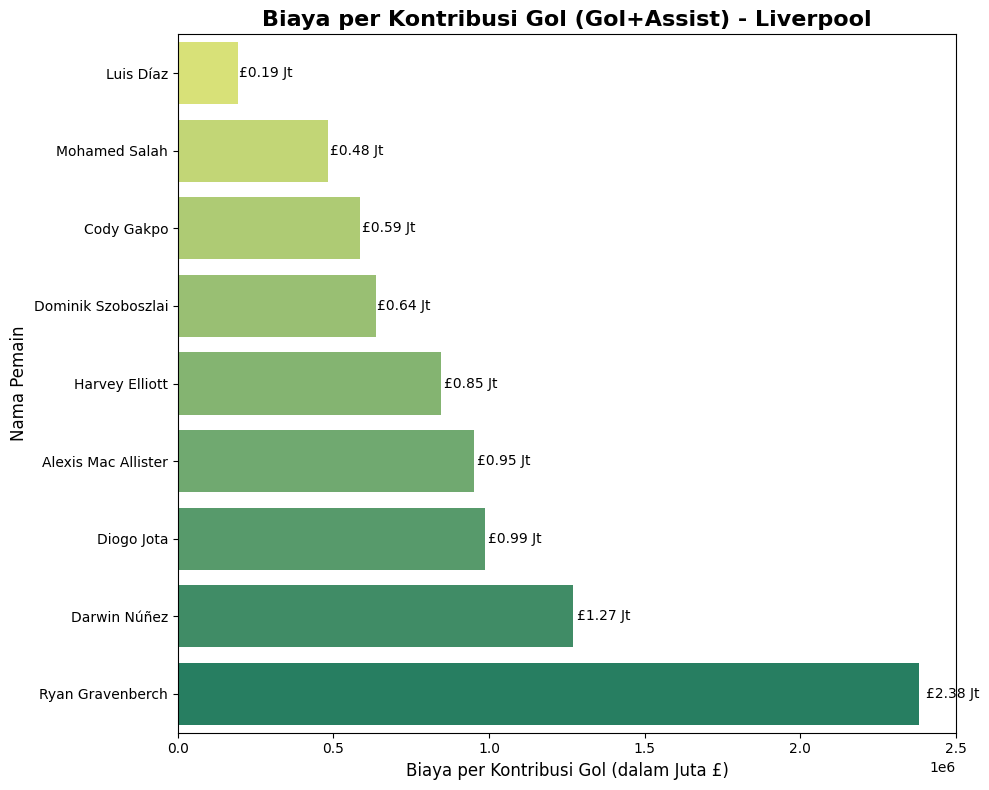

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Konfigurasi ---
file_path_stats = r'D:\Portofolio\Premier league\Data\player_stats.csv'
file_path_salaries = r'D:\Portofolio\Premier league\Data\player_salaries.csv'
team_to_analyze = 'Liverpool'

# ==============================================================================
# Analisis "Value for Money" Pemain Kunci
# ==============================================================================
try:
    # 1. Muat dataset statistik dan gaji
    stats_df = pd.read_csv(file_path_stats)
    salaries_df = pd.read_csv(file_path_salaries)
    print("File 'player_stats.csv' dan 'salaries.csv' berhasil dimuat.")

    # 2. Filter data untuk tim yang dianalisis (Liverpool)
    stats_liverpool = stats_df[stats_df['team'] == team_to_analyze][['name', 'position', 'goals', 'assists']].copy()
    salaries_liverpool = salaries_df[salaries_df['Team'] == team_to_analyze][['Player', 'Annual']].copy()

    # 3. Gabungkan (merge) kedua dataset berdasarkan nama pemain
    # Perhatikan: nama kolom pemain berbeda ('name' dan 'Player'), jadi kita spesifikasikan
    value_df = pd.merge(
        stats_liverpool,
        salaries_liverpool,
        left_on='name',
        right_on='Player',
        how='left'
    )

    # 4. Hitung metrik "Value for Money"
    # a. Hitung total kontribusi gol
    value_df['goal_contributions'] = value_df['goals'] + value_df['assists']

    # b. Filter pemain yang punya kontribusi > 0 dan merupakan pemain serang/tengah
    value_df_filtered = value_df[
        (value_df['goal_contributions'] > 0) & 
        (value_df['position'].isin(['FW', 'MF', 'MF,FW', 'FW,MF']))
    ].copy()

    # c. Hitung biaya per kontribusi gol (Gaji Tahunan / Total Kontribusi)
    value_df_filtered['cost_per_contribution'] = value_df_filtered['Annual'] / value_df_filtered['goal_contributions']

    # 5. Urutkan hasilnya untuk melihat siapa yang paling efisien
    final_value_table = value_df_filtered.sort_values(by='cost_per_contribution', ascending=True)

    # 6. Tampilkan hasil dalam bentuk tabel
    print(f"\n--- Analisis Value for Money: {team_to_analyze} (Pemain Depan & Tengah) ---")
    print("Diurutkan dari yang paling efisien (biaya per kontribusi gol terendah)")
    # Menampilkan hasil dengan format yang lebih rapi
    display_table = final_value_table[['name', 'goal_contributions', 'Annual', 'cost_per_contribution']].copy()
    display_table['Annual'] = display_table['Annual'].map('£{:,.0f}'.format)
    display_table['cost_per_contribution'] = display_table['cost_per_contribution'].map('£{:,.0f}'.format)
    print(display_table.to_string(index=False))

    # 7. Buat Visualisasi
    plt.figure(figsize=(10, 8))
    
    # Ambil 10 pemain paling efisien untuk divisualisasikan
    plot_data = final_value_table.head(10) 

    ax = sns.barplot(
        x='cost_per_contribution', 
        y='name', 
        data=plot_data, 
        palette='summer_r',
        hue='name',
        legend=False
    )

    plt.title(f'Biaya per Kontribusi Gol (Gol+Assist) - {team_to_analyze}', fontsize=16, fontweight='bold')
    plt.xlabel('Biaya per Kontribusi Gol (dalam Juta £)', fontsize=12)
    plt.ylabel('Nama Pemain', fontsize=12)

    # Menambahkan label biaya di setiap bar
    for p in ax.patches:
        width = p.get_width()
        plt.text(width * 1.01, p.get_y() + p.get_height()/2,
                 f'£{width/1000000:.2f} Jt',
                 va='center')

    plt.tight_layout()
    plt.show()


except FileNotFoundError as e:
    print(f"GAGAL: File tidak ditemukan. Pastikan path file sudah benar. Error: {e}")
except KeyError as e:
    print(f"GAGAL: Terjadi error nama kolom. Pastikan kolom {e} ada di dalam file Anda.")
except Exception as e:
    print(f"Terjadi error tak terduga: {e}")

# Conclusion
(en)Liverpool proved successful in winning the Premier League. This victory was achieved not because of being the club with the largest salary expenditure, but because of extraordinary spending efficiency compared to its competitors. This efficiency at the club level was realized because the new manager (Arne Slott) managed to mix the existing squad into a perfect “machine”: one superstar whose productivity is equivalent to the price (Salah), supported by highly efficient 'best value' players (Díaz), and supported by a solid and consistent team core (Gakpo, Szoboszlai, Mac Allister). They managed to maximize the output of the existing squad, rather than simply buying instant success.
# Kesimpulan
(id) Liverpool terbukti berhasil menjuarai Premier League. Kemenangan ini diraih bukan karena menjadi klub dengan belanja gaji terbesar, melainkan karena efisiensi pengeluaran yang luar biasa dibandingkan para pesaingnya. Efisiensi di level klub ini terwujud karena manajer baru (Arne Slott) berhasil meramu skuad yang ada menjadi sebuah "mesin" yang sempurna: satu mega bintang yang produktivitasnya setara dengan harganya (Salah), didukung oleh pemain-pemain 'best value' yang sangat efisien (Díaz), dan ditopang oleh inti tim yang solid dan konsisten (Gakpo, Szoboszlai, Mac Allister). Mereka berhasil memaksimalkan output dari skuad yang ada, bukan sekadar membeli kesuksesan instan.